In [86]:
import matplotlib.pylab as plt
import numpy as np
from math import *
from scipy.optimize import fsolve


In [198]:
L = 25
m_eigen = 300
g = 9.81
q = m_eigen / L * g

Fy = 500*g

L1 = L*0.1
L2 = L - L1

L0 = 26.3


def fun(x, *args):
    q, L1, L2, Fy, L0 = args
    H = x[0]
    C0 = x[1]
    C1 = x[2]
    C2 = x[3]
    C3 = x[4]
    ret = [H/q*cosh(C1) + C0, H/q * cosh(L2 * q /H + C3) + C2, H/q*cosh(L1*q/H + C1) + C0 - H/q * cosh(C3) - C2, H*sinh(L1*q/H + C1) + Fy - H*sinh(C3), 0]
    
    l = 0
    for index,item in enumerate(np.arange(0, L1 + L1/100,L1/100)):
        l = l + ((1 + sinh(q/H * item +C1)**2)**0.5) * (L1/100)
        
    for index,item in enumerate(np.arange(0, L2 + L2/100,L2/100)):
        l = l + ((1 + sinh(q/H * item +C3)**2)**0.5) * (L2/100)
        
    ret[-1] = l - L0
    
    return np.array(ret)
    

In [199]:
def getProfileAndForce(root, *args):
    q, L1, L2, Fy, L0 = args
    step = 0.01
    X1 = np.arange(0, L+step, step)

    Y = np.zeros(len(X1))
    S = np.zeros(len(X1))

    H, C0, C1, C2, C3 = root

    for index,item in enumerate(X1):
        if (item <= L1):
            Y[index] = H/q * cosh(q/H*item + C1) + C0
            S[index] = H * (1 + sinh(q/H * item + C1)**2)**0.5 / 1000
        else:
            Y[index] = H/q * cosh(q/H * (item - L1) + C3) + C2
            S[index] = H * (1 + sinh(q/H*(item-L1) + C3)**2)**0.5 / 1000
            
    return (X1, Y, S)

In [200]:
params = (q, L1, L2, Fy, L0)
root = fsolve(fun, [10000, 0, 0, 0, 0], params)
X1,Y,S = getProfileAndForce(root, *params)

[ 6.75682217e+03 -7.66493540e+01 -7.97721696e-01 -5.98345897e+01
 -1.01609262e-01]


array([-2.88196134e-11,  1.02176045e-11, -3.29620775e-11, -1.27545263e-09,
        1.13686838e-12])

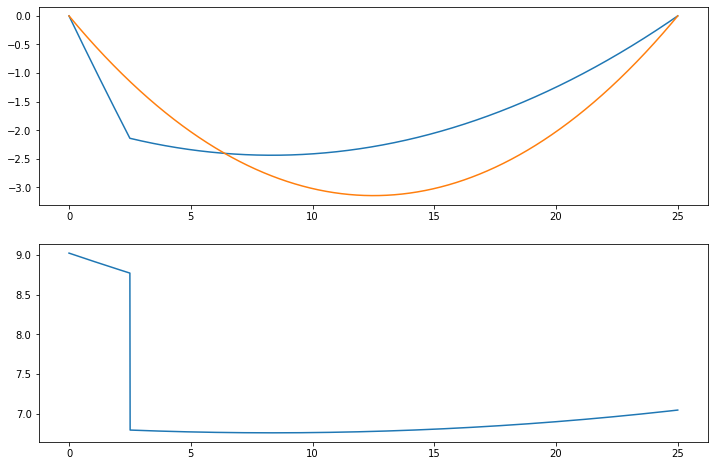

In [203]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(211)
plt.plot(X1, Y)

root_no_weight = fsolve(fun, [5000, 0, 0, 0, 0], (q, L1, L2, 0, L0))
print(root)

X2,Ynoweight, Snoweight = getProfileAndForce(root_no_weight, *(q, L1, L2, 0, L0))

plt.plot(X2, Ynoweight)

ax = fig.add_subplot(212)
plt.plot(X1, S)
fun(root, *params)

In [202]:

print(np.min(Ynoweight))

-3.143266246723357
